import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Image
import plotly
import plotly.graph_objs as go

In [51]:
import math
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
from IPython.display import Image
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt

## Loading Raw Data

In [6]:
def rename_cols_and_save(xls_name):
    df = pd.read_excel("../../data/{0}.xls".format(xls_name), index_col=None, header=None)
    if xls_name == 'hprice1':
        names_dict = {0:'price', 
                     1:'assess', 
                     2:'bdrms',
                     3:'lotsize', 
                     4:'sqrft', 
                     5:'colonial',
                     6:'lprice', 
                     7:'lassess', 
                     8:'llotsize',
                     9:'lsqrft', 
                    }
    elif xls_name == 'saving':
         names_dict = {0:'sav', 
                     1:'inc', 
                     2:'size',
                     3:'edu', 
                     4:'age', 
                     5:'black',
                     6:'cons', 
                      }
    elif xls_name == '401k':    
        names_dict = {0:'prate', 
                     1:'mrate', 
                     2:'totpart',
                     3:'totelg', 
                     4:'age', 
                     5:'totemp',
                     6:'sole', 
                     7:'ltotemp', 
                      }
        
    elif xls_name == '401ksubs': 
        
         
             
        names_dict = {0:'e401k', 
                     1:'inc', 
                     2:'marr',
                     3:'male', 
                     4:'age', 
                     5:'fsize',
                     6:'nettfa', 
                     7:'p401k',
                     8:'pira',
                     9:'incsq', 
                     10:'agesq',
                      }
        
        
    df.rename(columns = names_dict, inplace = True)
    df.to_csv("../../data/{0}.csv".format(xls_name), index=False)
    
    #print data dictionary after file is loaded
    f = open('../../data/{0}.des'.format(xls_name), 'r')
    file_contents = f.read()
    print(file_contents)
    
    
    
    return df


In [7]:
df = rename_cols_and_save(xls_name='401ksubs')



401KSUBS.DES

e401k     inc       marr      male      age       fsize     nettfa    p401k    
pira      incsq     agesq     

  Obs:     9275

 1. e401k                        =1 if eligble for 401(k)
 2. inc                          annual income, $1000s
 3. marr                         =1 if married
 4. male                         =1 if male respondent
 5. age                          age^2
 6. fsize                        family size
 7. nettfa                       net total fin. assets, $1000
 8. p401k                        =1 if participate in 401(k)
 9. pira                         =1 if have IRA
10. incsq                        inc^2
11. agesq                        age^2



In [8]:
class EDA(object):
    
    def __init__(self, df, y):
        self.df = df
        self.y_string = y
        self.y = df[y]
        return None
    
    
    def inspect(self):
        inspect = {}
        inspect['head'] = self.df.head()
        inspect['describe'] = self.df.describe().T
        inspect['dtypes'] = self.df.dtypes
        return inspect
        
        return inspect 
    
    def _dist_plot(self, df, var):
        plt.figure()
        sns_plot = sns.distplot(df[var], color='b').get_figure()
        sns_plot.savefig("dist_plot_{0}.png".format(var))
        return sns_plot
    
    
    def variation(self):
        numerical = self.df.select_dtypes(include=np.number)
        for col in numerical.columns: 
            self._dist_plot(df=numerical, var=col)   
        return None
    
    
    def _scatter_matrix(self):
        numerical = self.df.select_dtypes(include=np.number)
        plt.figure()
        sns_plot = sns.pairplot(numerical)
        sns_plot.savefig("scatter_matrix_plot.png".format())
        return None
    
    def _box_plot(self, var_x):
        plt.figure()
        sns_plot = sns.boxplot(x=var_x, y=self.y, data=self.df).get_figure()
        sns_plot.savefig("box_plot_{0}_{1}.png".format(var_x, self.y_string))
        return None
    
    def _scatter_plot(self, var_x):
        sns_plot = sns.lmplot(x=var_x, y=self.y_string, data=self.df)
        sns_plot.savefig("correlation_{0}_{1}.png".format(var_x, self.y_string))
        return None
    
    def covariation(self):
        self._scatter_matrix()
        
        categorical = self.df.select_dtypes(include=['bool', 'category']) 
        for col in categorical.columns:
            self._box_plot(var_x = col)
         
        numerical = self.df.select_dtypes(include=np.number)
        for col in numerical.columns:
            self._scatter_plot(var_x=col)
        return None
    
    def run(self):
        self.variation()
        self.covariation()
        return None
    
    pass

In [9]:
my_eda = EDA(df, y='nettfa')

In [10]:
my_eda.inspect()['head']

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [11]:
my_eda.inspect()['describe']

,count,mean,std,min,25%,50%,75%,max
e401k,9275.0,0.392129,0.488252,0.0000,0.0000,0.000,1.0000,1.000
inc,9275.0,39.254641,24.090002,10.0080,21.6600,33.288,50.1600,199.041
marr,9275.0,0.628571,0.483213,0.0000,0.0000,1.000,1.0000,1.000
male,9275.0,0.204420,0.403299,0.0000,0.0000,0.000,0.0000,1.000
age,9275.0,41.080216,10.299517,25.0000,33.0000,40.000,48.0000,64.000
fsize,9275.0,2.885067,1.525835,1.0000,2.0000,3.000,4.0000,13.000
nettfa,9275.0,19.071675,63.963838,-502.3020,-0.5000,2.000,18.4495,1536.798
p401k,9275.0,0.276226,0.447154,0.0000,0.0000,0.000,1.0000,1.000
pira,9275.0,0.254340,0.435513,0.0000,0.0000,0.000,1.0000,1.000
incsq,9275.0,2121.192483,3001.469424,100.1601,469.1556,1108.091,2516.0255,39617.320


## Cleaning Dataset

In [12]:
def to_bool(df, list_of_vars):
    for var in list_of_vars:
        df[var] = df[var].astype('bool')
    return df

In [13]:
bool_vars = ['e401k', 'marr', 'male', 'p401k', 'pira']

In [14]:
df_clean = to_bool(df=df, list_of_vars=bool_vars)

In [15]:
df_clean.dtypes

e401k        bool
inc       float64
marr         bool
male         bool
age         int64
fsize       int64
nettfa    float64
p401k        bool
pira         bool
incsq     float64
agesq       int64
dtype: object

In [16]:
my_eda_clean = EDA(df, y='nettfa')

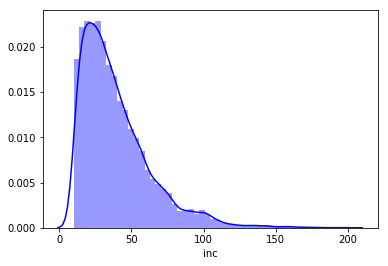

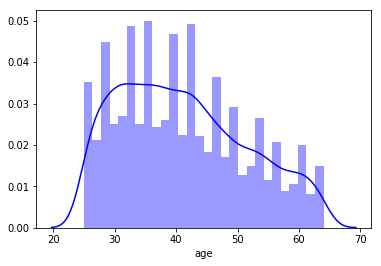

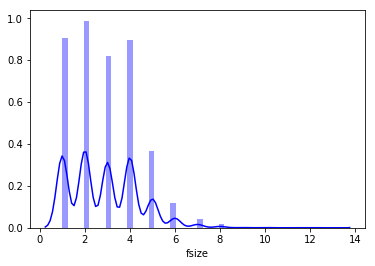

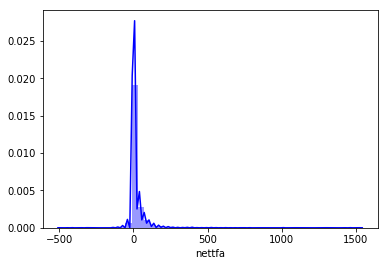

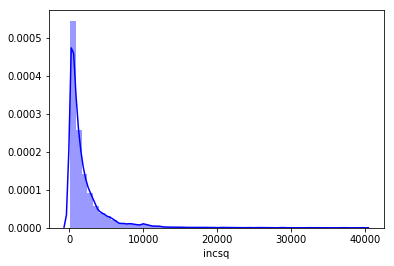

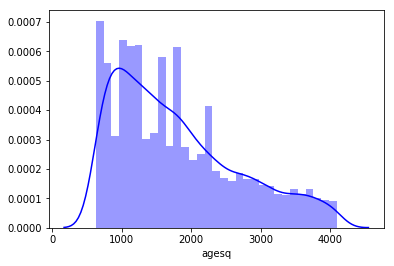

<Figure size 432x288 with 0 Axes>

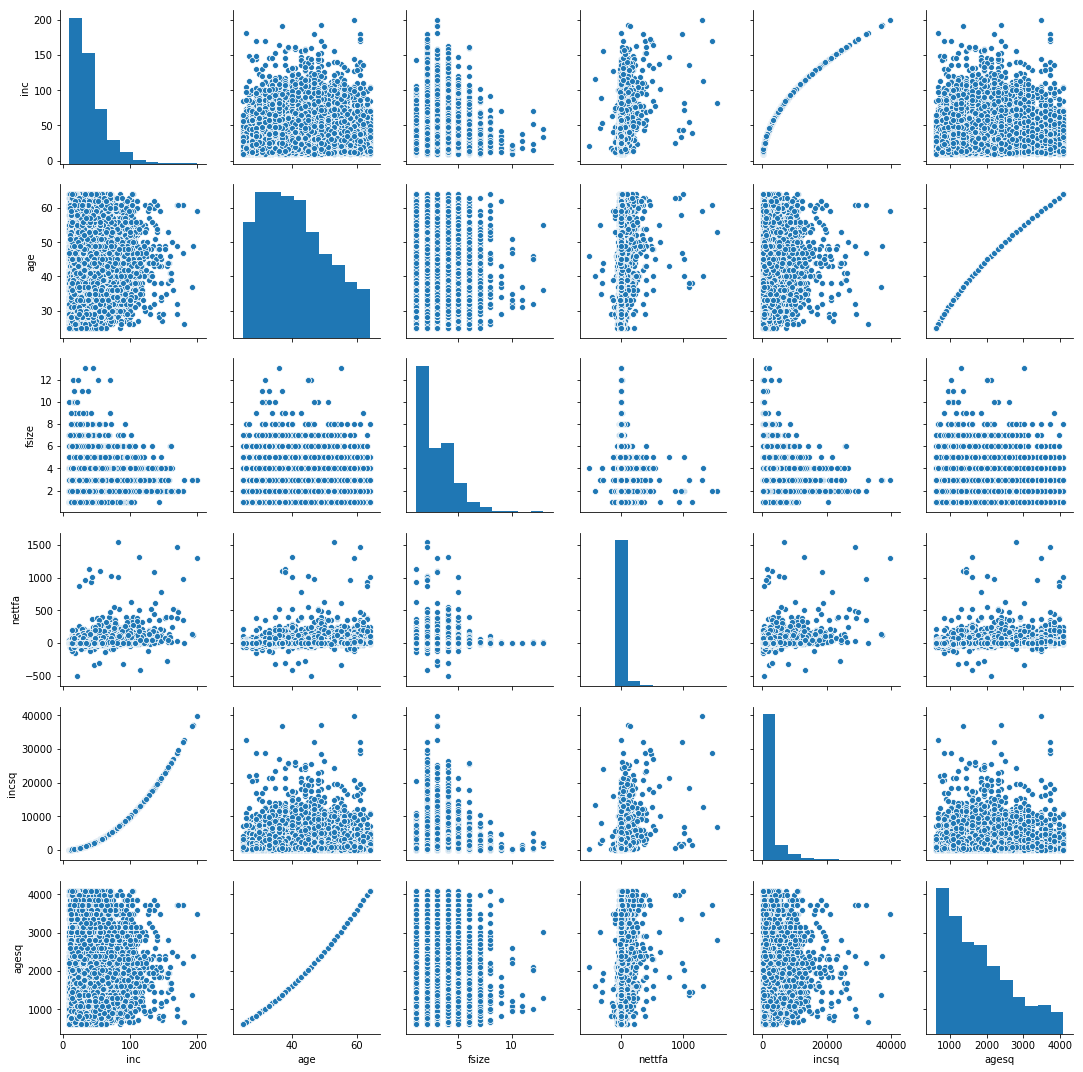

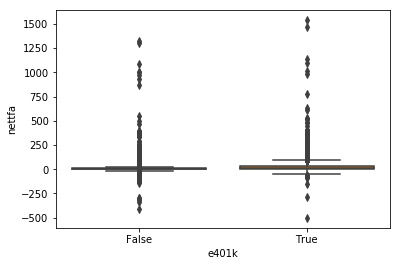

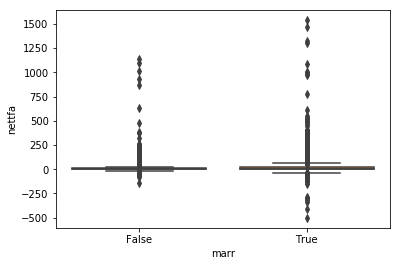

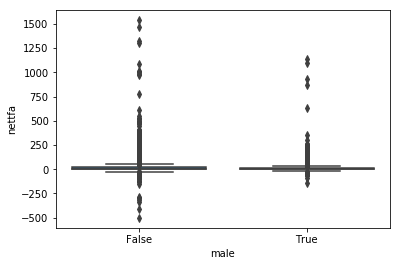

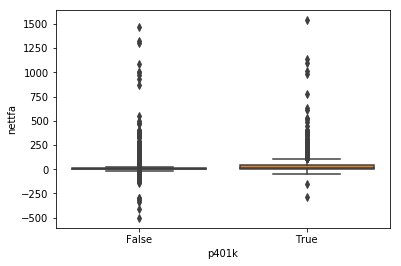

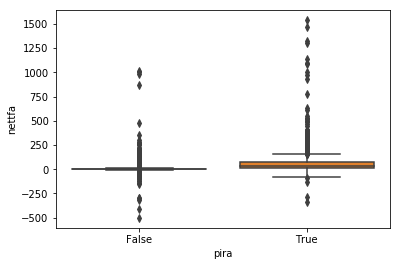

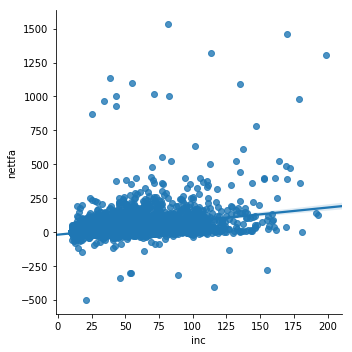

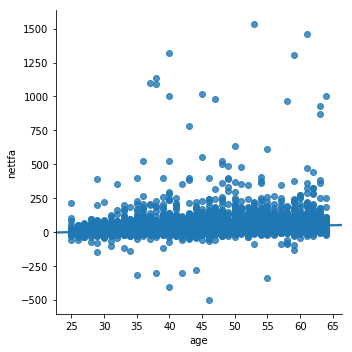

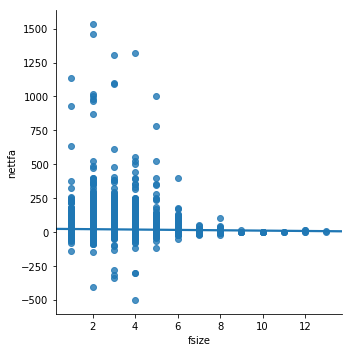

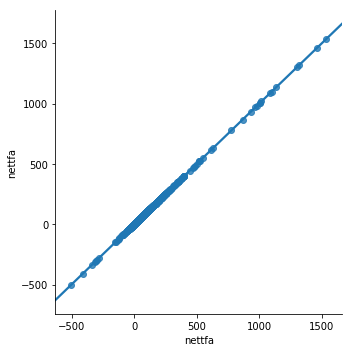

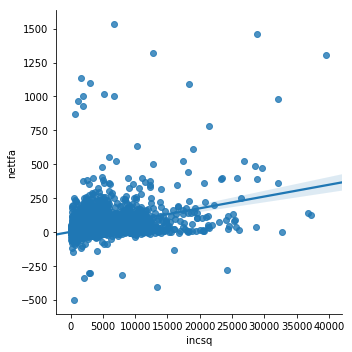

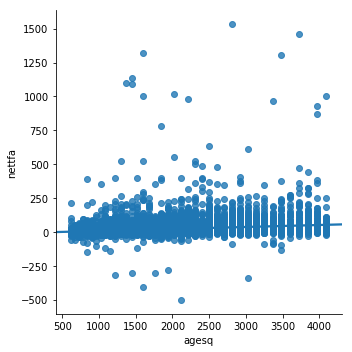

In [17]:
my_eda_clean.run()

## Initial Regression Models

In [18]:
class Regression(object):
    
    def __init__(self, df, formula, formula_final):
        self.df = df
        self.formula = formula
        self.formula_final = formula_final
        return None
    
    def _regressions(self, formula, data):
        models = {}
        models['res_ols'] = smf.ols(formula=formula, data=data).fit().summary()
        models['res_reg_ridge']  = smf.ols(formula=formula, data=data).fit_regularized(method='elastic_net', alpha=0, L1_wt=1.0).params
        models['res_reg_lasso']  = smf.ols(formula=formula, data=data).fit_regularized(method='elastic_net', alpha=1, L1_wt=1.0).params
        return models

    def _final_regression(self, formula_final, data):
        final_model = smf.ols(formula=formula_final, data=data).fit().summary()
        return final_model
    
    def run(self):
        all_models = {}
        all_models['candidate_models'] = self._regressions(formula=self.formula, data=self.df)
        all_models['final_model'] = self._final_regression(formula_final=self.formula_final, data=self.df)
        return all_models
    pass


In [19]:
my_regression = Regression(df = df_clean, 
                           formula = 'nettfa ~ inc + e401k + marr + male + age + fsize + p401k + pira + incsq + agesq', 
                           formula_final = 'nettfa ~ inc + age + fsize + p401k + pira + incsq + agesq')

my_regression.run()

{'candidate_models': {'res_ols': <class 'statsmodels.iolib.summary.Summary'>
  """
                              OLS Regression Results                            
  Dep. Variable:                 nettfa   R-squared:                       0.248
  Model:                            OLS   Adj. R-squared:                  0.247
  Method:                 Least Squares   F-statistic:                     305.5
  Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
  Time:                        23:28:46   Log-Likelihood:                -50407.
  No. Observations:                9275   AIC:                         1.008e+05
  Df Residuals:                    9264   BIC:                         1.009e+05
  Df Model:                          10                                         
  Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
  ---------------------

## Candidate Model

In [20]:
candidate = smf.ols(formula='nettfa ~ inc + age + fsize + p401k + pira + incsq + agesq', data=df_clean).fit()
candidate.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nettfa   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     435.4
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:28:46   Log-Likelihood:                -50410.
No. Observations:                9275   AIC:                         1.008e+05
Df Residuals:                    9267   BIC:                         1.009e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        26.6004      9.701      2.742      0.006       7.584      45.617
p401k[T.True]    14.2605      1.350     10.567      0.000      11.615      16.906
pira[T.True]     31.4170      1.467     21.423      0.000      28.542      34.292
inc              -0.5669      0.073     -7.722      0.000      -0.711      -0.423
age              -1.6168      0.477     -3.388      0.001      -2.552      -0.681
fsize            -1.1438      0.390     -2.930      0.003      -1.909      -0.379
incsq             0.0109      0.001     19.179      0.000       0.010       0.012
agesq             0.0275      0.005      5.014      0.000       0.017       0.038
==============================================================================
Omnibus:                    15071.770   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16359646.641
Skew:                          10.549   Prob(JB):                         0.00
Kurtosis:                     207.663   Cond. No.                     6.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Diagnostics

In [21]:
def normality_of_residuals(model_fit):
    print("INTERPRETATION: if Chi^2 two-tail prob. < .10 then the residuals are NOT normally distributed")
    name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
    test = sms.jarque_bera(model_fit.resid)
    return lzip(name, test)

normality_of_residuals(model_fit=candidate)

INTERPRETATION: if Chi^2 two-tail prob. < .10 then the residuals are NOT normally distributed


[('Jarque-Bera', 16359646.641233712),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 10.548635752216754),
 ('Kurtosis', 207.66349069230108)]

In [38]:
def identify_outliers(model_fit):
    obs_influence = OLSInfluence(model_fit)
    summary_frame = obs_influence.summary_frame()
    return summary_frame


obs_influence = identify_outliers(model_fit=candidate)

my_eda_influence = EDA(df=obs_influence, y='cooks_d')

my_eda_influence.run()




,dfb_Intercept,dfb_p401k[T.True],dfb_pira[T.True],dfb_inc,dfb_age,dfb_fsize,dfb_incsq,dfb_agesq,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.004043,0.002192,-0.011439,0.008347,-0.006688,0.005431,-0.005796,0.007050,3.571486e-05,-0.469881,0.001292,-0.016903,-0.469861,-0.016903
1,-0.007638,0.032923,-0.027300,0.030158,0.008734,-0.038206,-0.023070,-0.010275,6.300680e-04,2.359682,0.000904,0.070997,2.360264,0.071014
2,0.000184,0.000050,0.000039,0.000240,-0.000249,0.000115,-0.000194,0.000241,2.226241e-08,-0.016991,0.000617,-0.000422,-0.016990,-0.000422
3,0.006354,0.008282,0.010585,-0.004979,-0.006272,0.007551,-0.002679,0.006053,7.329483e-05,-0.638205,0.001438,-0.024215,-0.638185,-0.024214
4,-0.000821,-0.000683,-0.001114,-0.000480,0.001061,-0.001999,0.000313,-0.000810,1.718648e-06,0.155893,0.000565,0.003708,0.155885,0.003708
5,-0.004214,0.000553,0.002134,0.003581,0.004342,-0.002008,-0.002925,-0.005267,1.504840e-05,-0.344964,0.001011,-0.010972,-0.344947,-0.010972
6,0.003880,0.004208,-0.010519,0.000170,-0.003021,-0.007919,0.001643,0.002763,3.099598e-05,-0.534480,0.000867,-0.015747,-0.534460,-0.015746
7,-0.000619,-0.000594,-0.000337,0.000100,0.000580,0.001306,-0.000197,-0.000602,5.585737e-07,0.102780,0.000423,0.002114,0.102775,0.002114
8,0.004080,0.006673,-0.010611,-0.005139,-0.003468,0.004264,0.005819,0.002919,4.026953e-05,-0.691510,0.000673,-0.017949,-0.691490,-0.017948
9,0.000609,0.000404,-0.001065,0.000172,-0.000756,0.000711,0.000020,0.000764,3.315533e-07,-0.053590,0.000923,-0.001629,-0.053587,-0.001629


In [128]:

n = len(obs_influence.index)
k = len(['inc', 'age', 'fsize', 'p401k', 'pira', 'incsq' , 'agesq'])
#high cooks distance
high_cooks_d = obs_influence[obs_influence['cooks_d'] > 4/n]
#large dffits
large_dffits = obs_influence[obs_influence['dffits'].abs() > (2 * math.sqrt(k/n))] 
#large dfbetas
dfb_cols = [col for col in obs_influence.columns if 'dfb' in col]
dfb_frames = [obs_influence[obs_influence[col].abs() > (2 / math.sqrt(n))] for col in dfb_cols ]
dfb_merged = dfb_frames[0]
for df in dfb_frames[1:]:
    dfb_merged = pd.merge(merged, df, how='inner')  

#final influential observations
final_influential_observations = [high_cooks_d, large_dffits, dfb_merged]

final_merge = final_influential_observations[0]
for df in final_influential_observations[1:]:
    final_merge = pd.merge(final_merge, df, how='inner')  


df_final = df_clean.merge(final_merge, left_index=True, right_index=True, how='left', indicator=True)

df_final = df_final[df_final['_merge'] == 'left_only']





    



    













/Users/jjespinoza/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



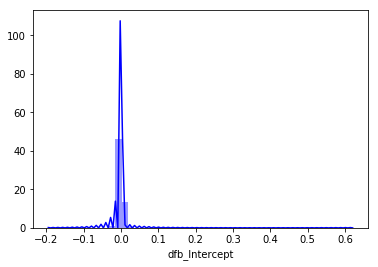

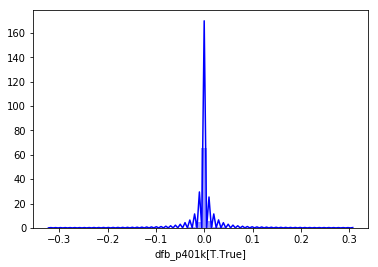

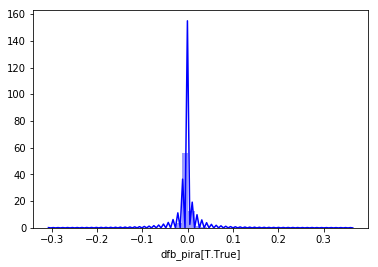

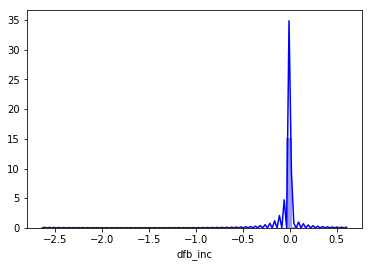

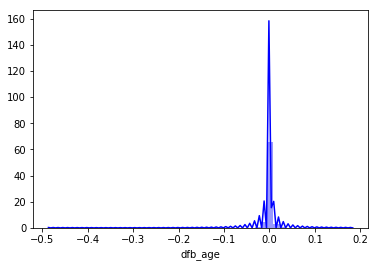

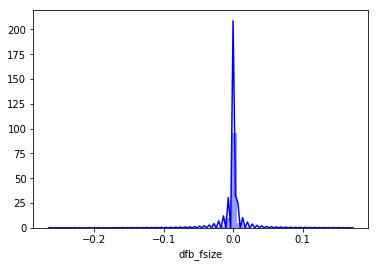

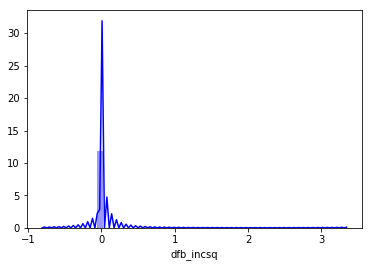

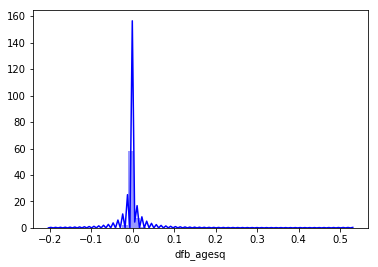

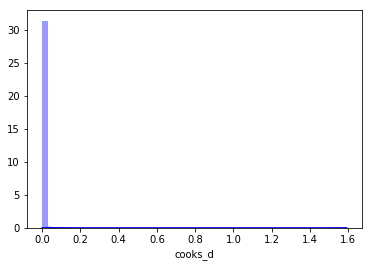

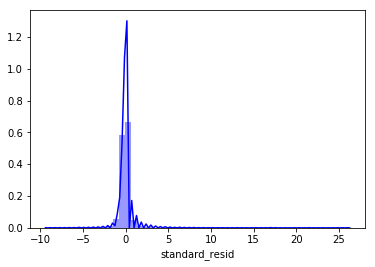

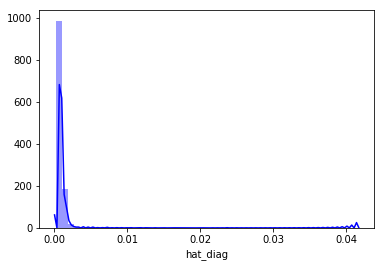

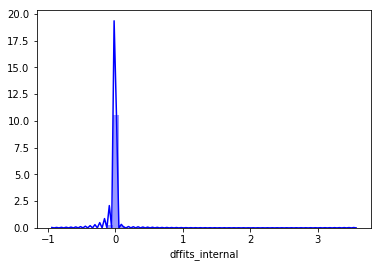

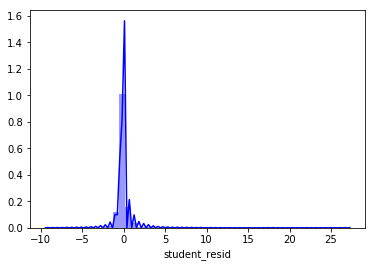

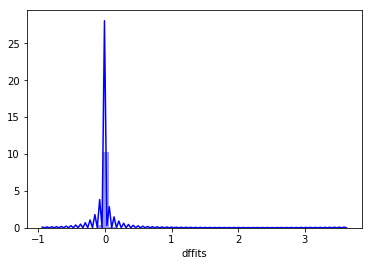

<Figure size 432x288 with 0 Axes>

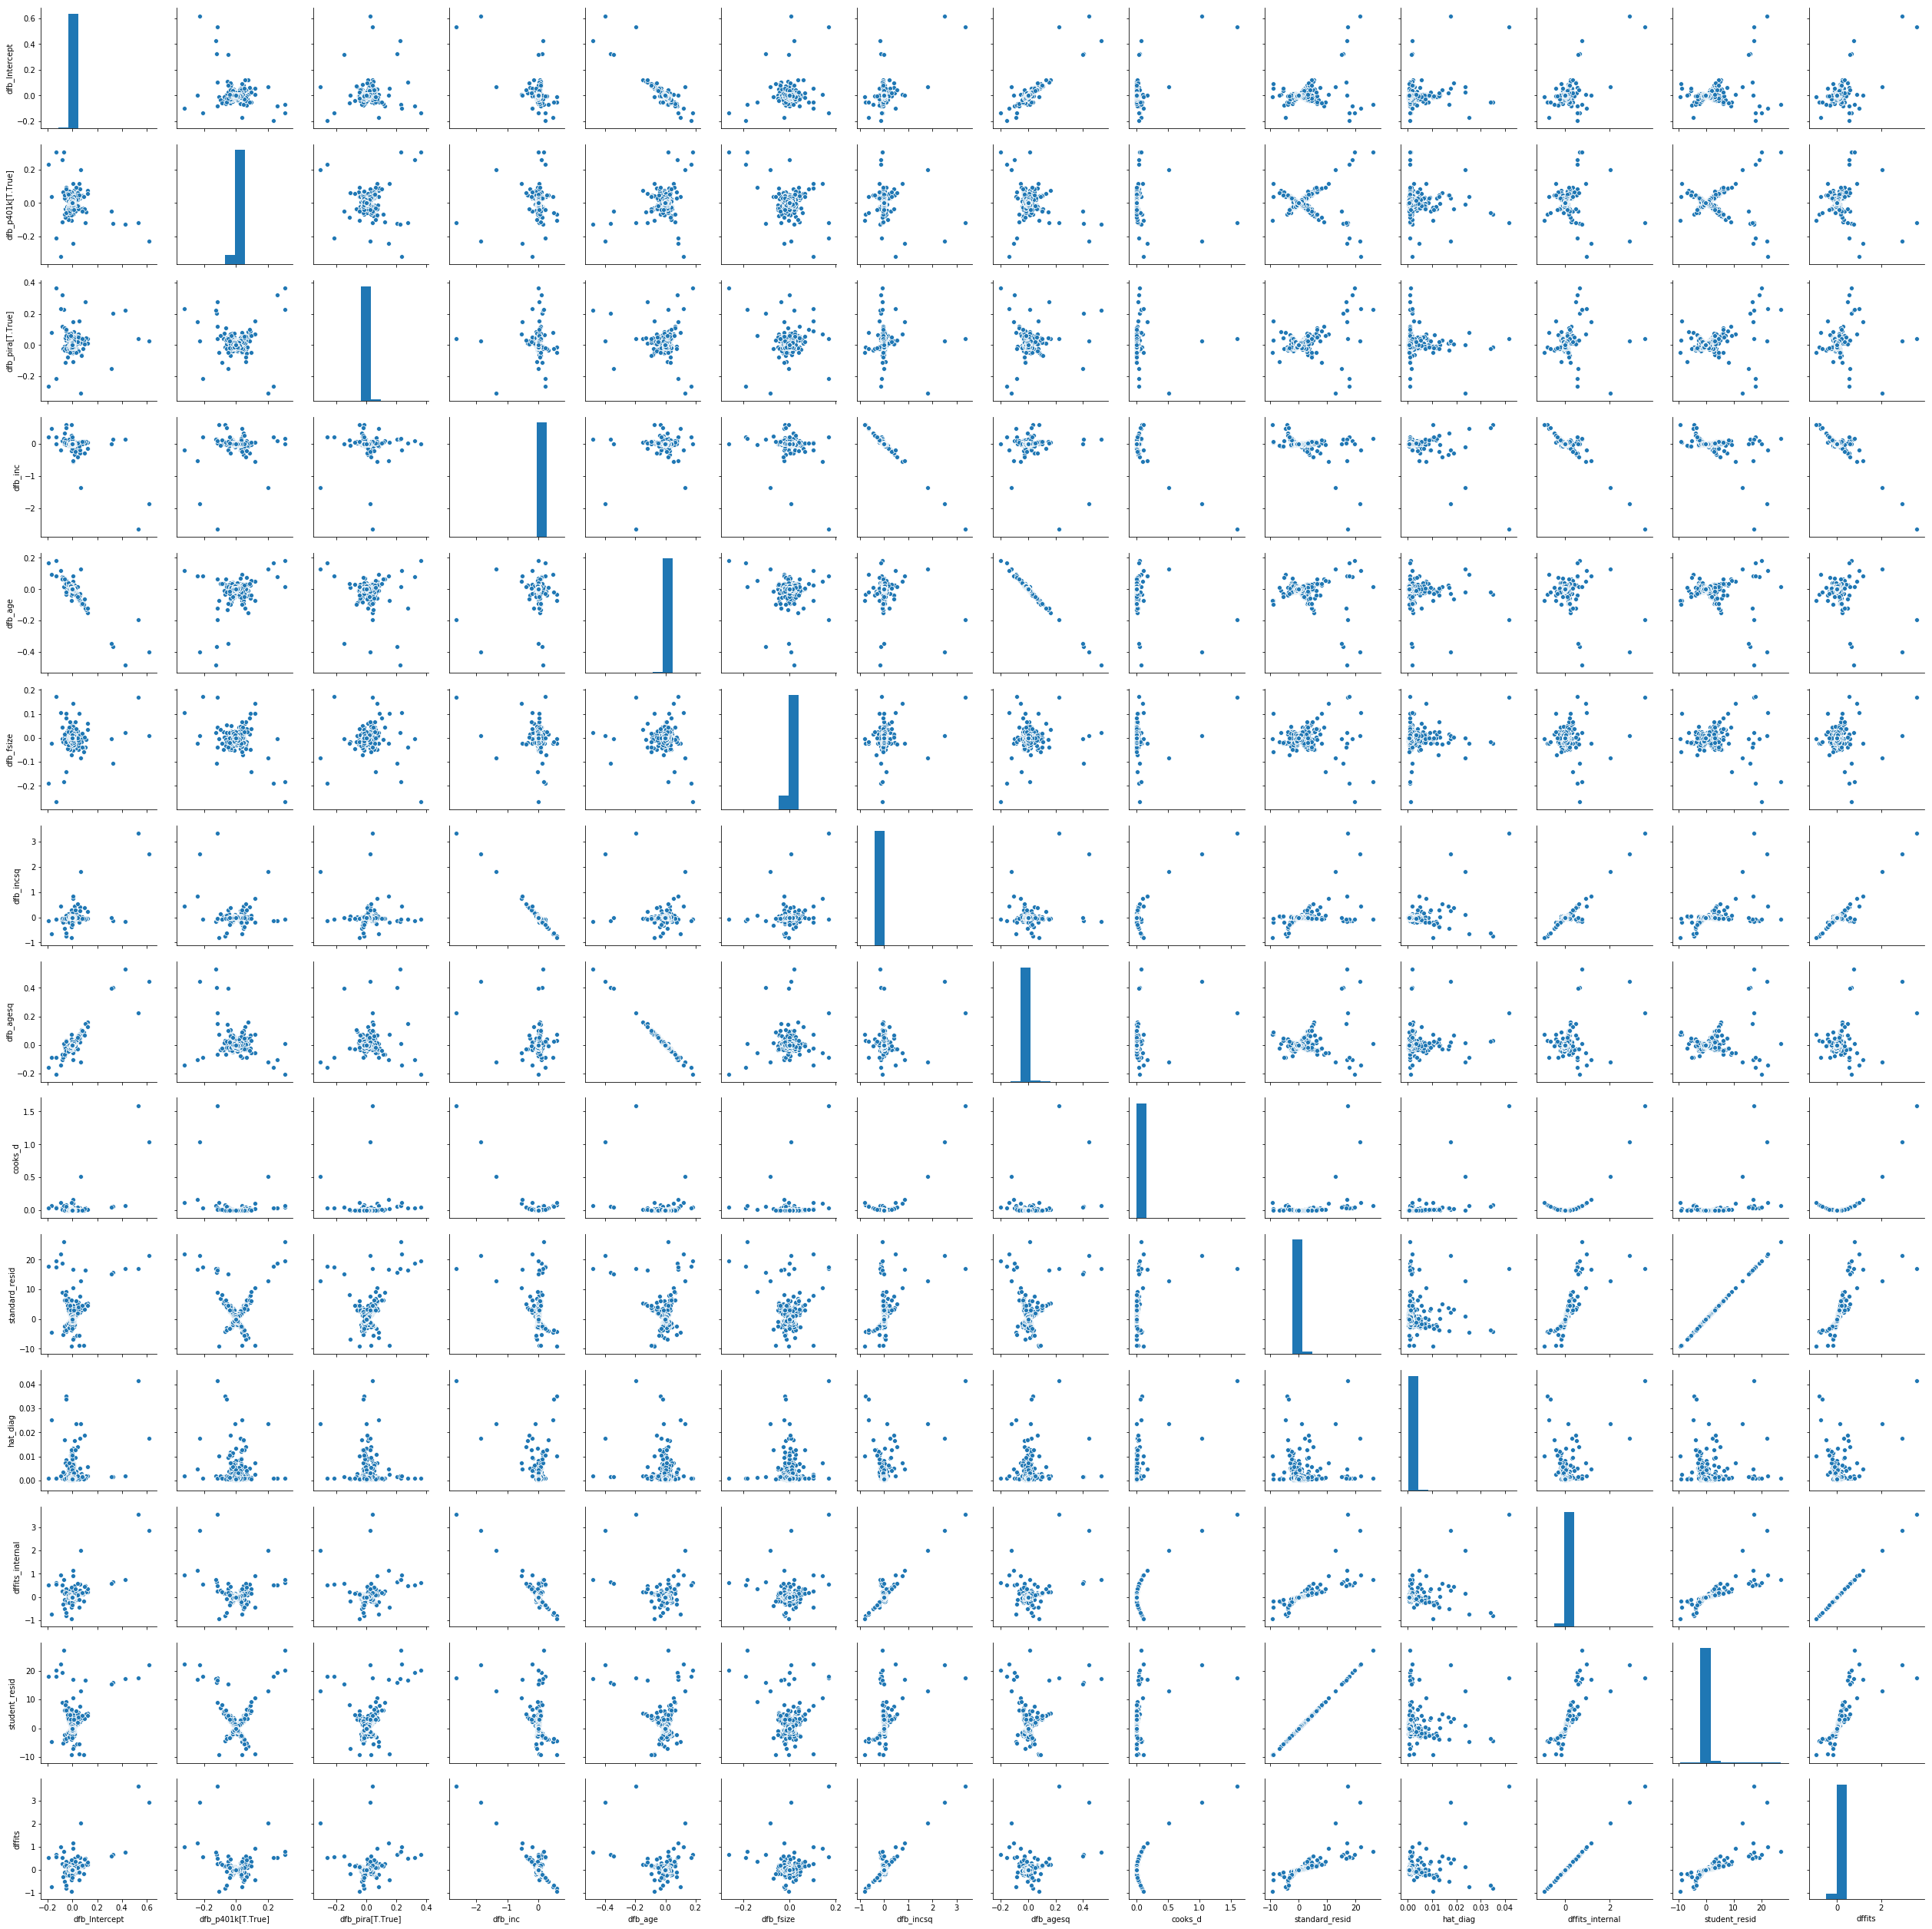

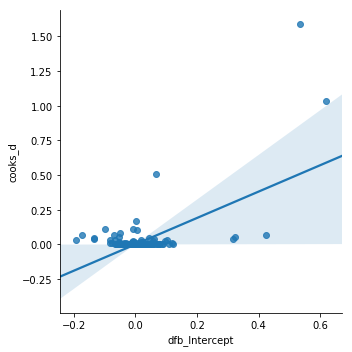

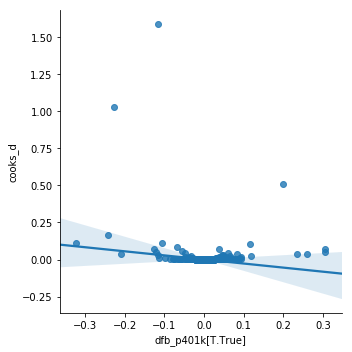

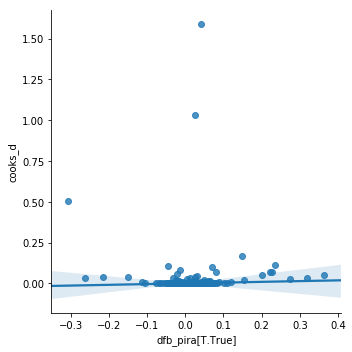

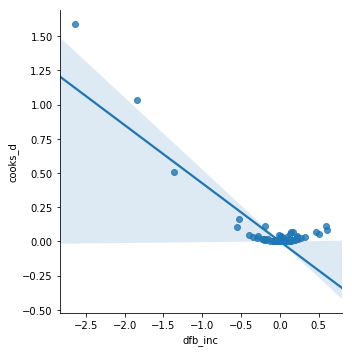

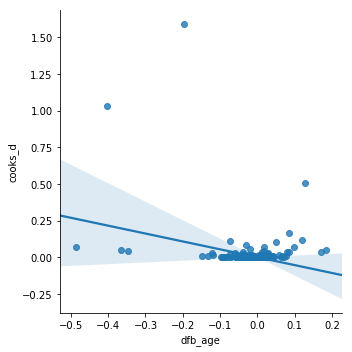

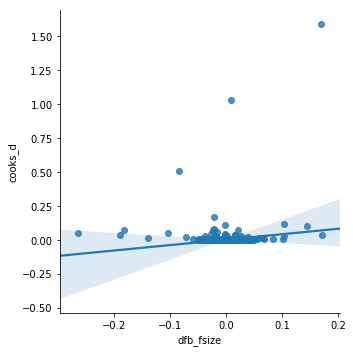

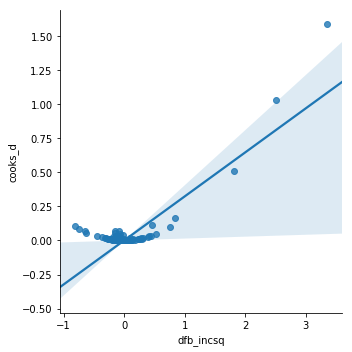

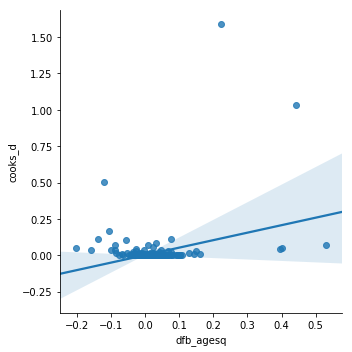

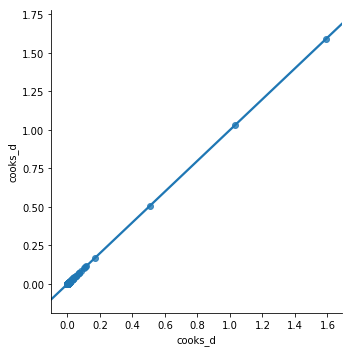

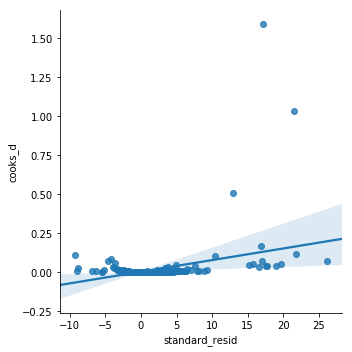

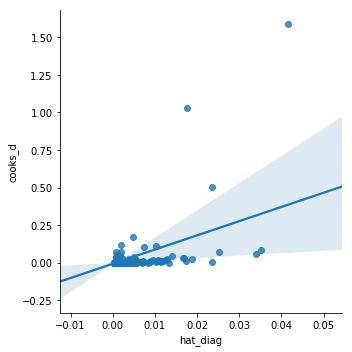

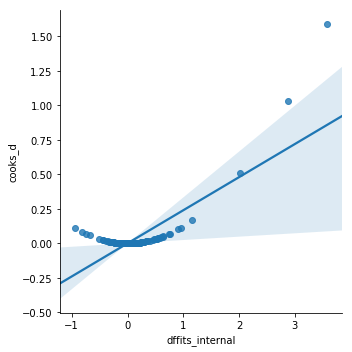

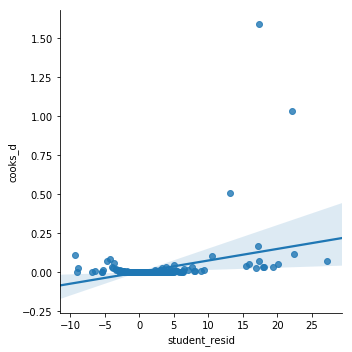

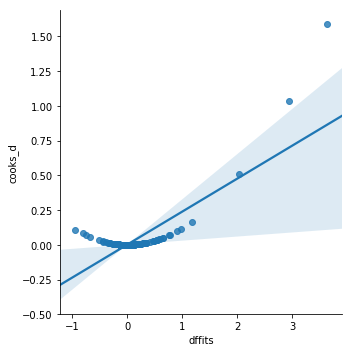

In [35]:
def multicollinearity(X):
    print("INTERPRETATION: VIF Factor larger than 10 this feature is multicollinear")
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

In [36]:
X = df_clean[['inc', 'age', 'fsize', 'p401k', 'pira', 'incsq' , 'agesq']]
X = X.select_dtypes(include=np.number)
multicollinearity(X=X)


INTERPRETATION: VIF Factor larger than 10 this feature is multicollinear


,VIF Factor,features
0,32.049966,inc
1,68.936040,age
2,4.812493,fsize
3,12.919816,incsq
4,34.886031,agesq


## Final Model

In [130]:
my_regression_final = Regression(df = df_final, 
                           formula = 'nettfa ~ inc + e401k + marr + male + age + fsize + p401k + pira + incsq + agesq', 
                           formula_final = 'nettfa ~ inc + age + fsize + p401k + pira + incsq + agesq')

my_regression_final.run()['final_model']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nettfa   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     434.6
Date:                Fri, 03 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:33:41   Log-Likelihood:                -50271.
No. Observations:                9248   AIC:                         1.006e+05
Df Residuals:                    9240   BIC:                         1.006e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        26.5885      9.721      2.735      0.006       7.534      45.643
p401k[T.True]    14.2179      1.352     10.518      0.000      11.568      16.868
pira[T.True]     31.5041      1.471     21.420      0.000      28.621      34.387
inc              -0.5709      0.074     -7.763      0.000      -0.715      -0.427
age              -1.6155      0.478     -3.378      0.001      -2.553      -0.678
fsize            -1.1286      0.391     -2.884      0.004      -1.896      -0.362
incsq             0.0110      0.001     19.206      0.000       0.010       0.012
agesq             0.0275      0.005      5.003      0.000       0.017       0.038
==============================================================================
Omnibus:                    15026.030   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16283652.939
Skew:                          10.546   Prob(JB):                         0.00
Kurtosis:                     207.484   Cond. No.                     6.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""